In [1]:
import numpy as np
from typing import Callable, Union
from scipy.signal import convolve2d
from matplotlib import pyplot as plt
from skimage import io, transform, color
from numpy.typing import NDArray
from sklearn.metrics import mean_squared_error

(490, 490, 3)


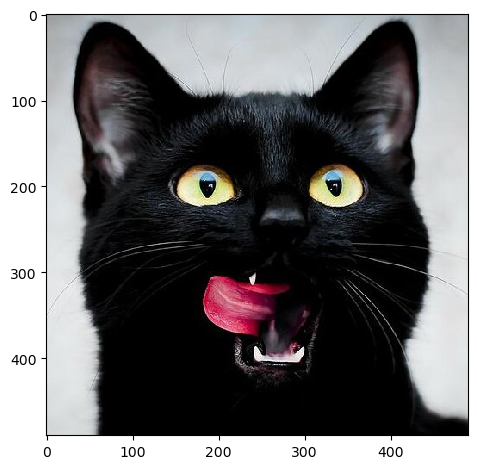

In [2]:
image = io.imread("kot.jpg")
print(image.shape)
io.imshow(image);

(490, 490)


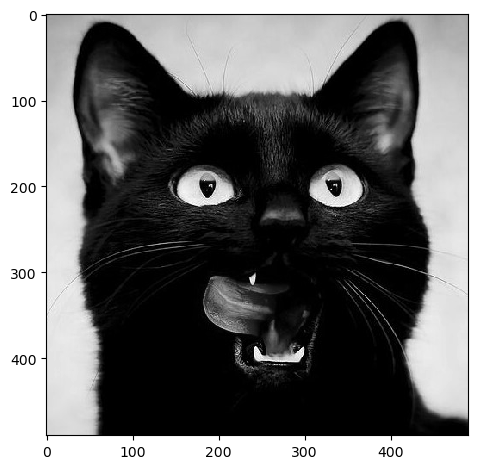

In [3]:
grey = color.rgb2gray(image)
print(grey.shape)
io.imshow(grey);

In [4]:
def downsample(image, kernel_size=None):
    if kernel_size is None:
        kernel_size = (2, 2)
    kernel = np.ones(kernel_size) / (kernel_size[0] * kernel_size[1])
    result = convolve2d(image, kernel, mode='valid')[::kernel_size[0], ::kernel_size[1]]
    return result

(245, 245)


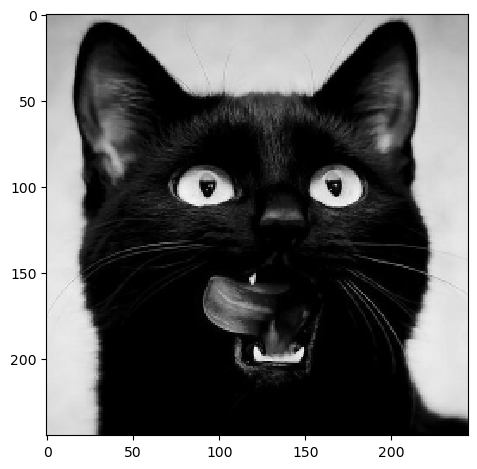

In [5]:
downsampled_image = downsample(grey)
print(downsampled_image.shape)
io.imshow(downsampled_image);

In [6]:
def linear_kernel(x: NDArray, offset: float, width: float) -> NDArray:
    x = x - offset
    x = x / width
    return (1 - np.abs(x)) * (np.abs(x) < 1)

def interpolate(x_measure: NDArray, y_measure: NDArray, x_interpolate: NDArray, kernel: callable) -> NDArray:
    width = x_measure[1] - x_measure[0]
    kernels = np.asarray([kernel(x_interpolate, offset=offset, width=width) for offset in x_measure])

    return y_measure @kernels

In [7]:
def image_interpolate(image: np.ndarray, kernel: Callable, ratio: int) -> np.ndarray:
    rows, cols = image.shape
    
    x_interpolate = np.linspace(0, rows, ratio * rows, endpoint=False)
    interpolated_rows = np.apply_along_axis(lambda row: interpolate(np.arange(cols), row, x_interpolate, kernel), 1, image)
    
    x_interpolate_cols = np.linspace(0, cols, ratio * cols, endpoint=False)
    interpolated_image = np.apply_along_axis(lambda col: interpolate(np.arange(rows), col, x_interpolate_cols, kernel), 0, interpolated_rows)

    return interpolated_image

(980, 980)


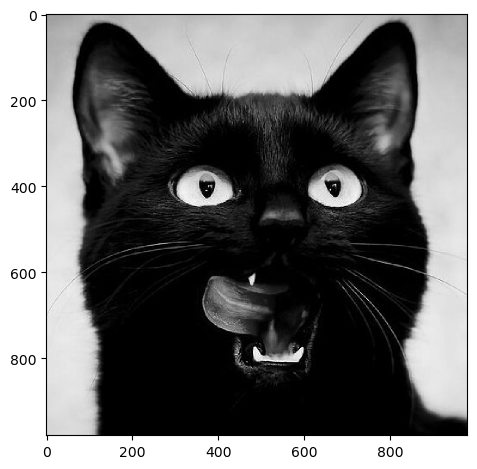

In [8]:
upsampled_image = image_interpolate(grey, kernel=linear_kernel, ratio=2)
upsampled_image.shape
print(upsampled_image.shape)
io.imshow(upsampled_image);